# Homework 9 and 10
Michael Eng

# Homework 9
## Part 1

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape) 
print(x_test.shape) 

(60000, 784)
(10000, 784)


In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential

## Part 2

In [4]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

def make_autoencoder(epochs = 10):
    autoencoder = Sequential()
    autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))
    autoencoder.add(Dense(input_dim, activation='sigmoid'))
    input_img = Input(shape=(input_dim,))
    encoder_layer = autoencoder.layers[0]
    encoder = Model(input_img, encoder_ layer(input_img))

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=256,
                shuffle=True,
                verbose=False,
                validation_data=(x_test, x_test))
    return {'encoder':encoder, 'autoencoder':autoencoder, 'history':history.history}
    


Compression factor: 24.5


In [ ]:
# Make a list of histories calling the make_autoencoder with a list of epochs to try as the parameter.
histories = [make_autoencoder(i) for i in [5,10,20,30,40,50,100]]

In [5]:
import matplotlib.pyplot as plt

def show_images(x_test, histories, nodes):
    num_images = 10
    np.random.seed(42)
    px_size = int(np.sqrt(x_test.shape[1]))
    random_test_images = np.random.randint(x_test.shape[0], size=num_images)

    encoded_imgs = [histories[i]['encoder'].predict(x_test) for i in range(len(histories))]
    decoded_imgs = [histories[i]['autoencoder'].predict(x_test) for i in range(len(histories))]

    plt.figure(figsize=(18, 4 + len(histories) - 1))

    repeats = len(histories)

    for i, image_idx in enumerate(random_test_images):

        # plot original image
        ax = plt.subplot(2 + repeats, num_images, i + 1)
        plt.imshow(reshape(x_test[image_idx], (px_size, px_size)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # plot encoded image
        ax = plt.subplot(2 + repeats, num_images, num_images + i + 1)
        plt.imshow(encoded_imgs[0][image_idx].reshape(8, int(nodes[0]/8)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # plot reconstructed image
        for j in range(repeats):
            ax = plt.subplot(2 + repeats, num_images, (j+2)*num_images + i + 1)
            plt.imshow(reshape(decoded_imgs[j][image_idx], (px_size, px_size)))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
    plt.show()    

In [ ]:
show_images(x_test, histories)

In [ ]:
for history in histories:
    history = history[2].history['val_loss']
    plt.plot([k / (len(history) - 1) for k in range(len(history))], history, label=str(len(history)) + ' epochs')
plt.title('Validation Loss, per percent of total epochs')
plt.xlabel('% of total Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

The plot of original testing images over the reconstructed images shows that the reconstruction does improve with more epochs, however the improvement seems negligible after 30 epochs. 

In the next graph, the Validation Loss per percent of total epochs is shown. The amount of epochs is normalized to show improvements over different amounts of epochs. 

# Deep AutoEncoder
## Part 3

In [6]:
def make_autoencoder_layers(nodes=[32, 128, 500], epochs = 30, x_train = None, x_val=None, batch_size=256):
    autoencoder = Sequential()
    # input dimension = 784
    input_dim = x_train.shape[1]
    encoding_dim = nodes[0]
    layers = len(nodes) - 1
    
    compression_factor = float(input_dim) / encoding_dim
    print("Compression factor: %s" % compression_factor)

    # Encoder Layers
    autoencoder.add(Dense(nodes[len(nodes) - 1], input_shape=(input_dim,), activation='relu'))
    for i in range(len(nodes) - 2, -1, -1):
        autoencoder.add(Dense(nodes[i], activation='relu'))

    # Decoder Layers
    for i in range(1, len(nodes)):
        autoencoder.add(Dense(nodes[i], activation='relu'))
    autoencoder.add(Dense(input_dim, activation='sigmoid'))
    print(autoencoder.summary())

    input_img = Input(shape=(input_dim,))
    encoder_layer = input_img
    for i in range(0, layers + 1):
        encoder_layer = autoencoder.layers[i](encoder_layer)
    encoder = Model(input_img, encoder_layer)
    
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = encoded_input
    for i in range(layers + 1, 0, -1):
        decoder_layer = autoencoder.layers[-i](decoder_layer)
    decoder = Model(encoded_input, decoder_layer)
        
    if x_train is not None:
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
        history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=False,
                validation_data=(x_val, x_val))
    
    return {'encoder':encoder, 'autoencoder':autoencoder, 'history':history.history, 'decoder':decoder}
        

In [7]:
def decoder(encoded_input):
    h=Dense(inter_encoding_dim, activation='relu')(encoded_input)
    decoded= Dense(input_dim, activation='sigmoid')(h)
    return decoded


In [72]:
# Make a list of histories calling the make_autoencoder_layers with a list of transition layers
# to try as the parameter.

nodes = [[32, 128, 500],
         [32, 128, 256, 512],
         [32, 64, 128, 256, 512],
         [32, 64, 128, 256, 512, 1024]]
histories = [make_autoencoder_layers(nodes=i, x_train=x_train, x_test=x_test) for i in nodes]

Compression factor: 24.5
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 500)               392500    
_________________________________________________________________
dense_208 (Dense)            (None, 128)               64128     
_________________________________________________________________
dense_209 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_210 (Dense)            (None, 128)               4224      
_________________________________________________________________
dense_211 (Dense)            (None, 500)               64500     
_________________________________________________________________
dense_212 (Dense)            (None, 784)               392784    
Total params: 922,264
Trainable params: 922,264
Non-trainable params: 0
______________________

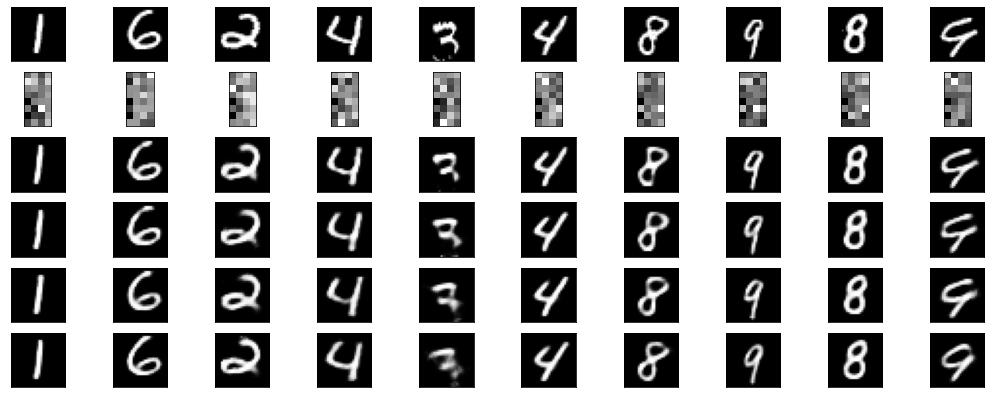

In [79]:
show_images(x_test, histories)

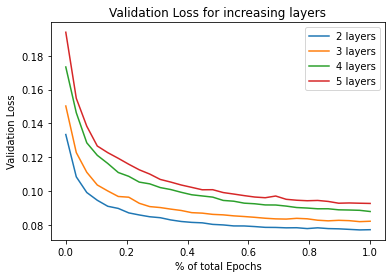

In [81]:
for i,history in enumerate(histories):
    history = history['history']['val_loss']
    plt.plot([k / (len(history) - 1) for k in range(len(history))], history, label=str(len(nodes[i]) - 1) + ' layers')
plt.title('Validation Loss for increasing layers')
plt.xlabel('% of total Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

It looks like the validation loss increases as the amount of layers increases. 

## Part 4, Random images

In [8]:
from tensorflow.keras.datasets import cifar10
import numpy as np
(x_train, _), (x_test, _) = cifar10.load_data()
print(x_train.shape)

(50000, 32, 32, 3)


In [13]:
from tensorflow.image import rgb_to_grayscale
from tensorflow import reshape

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = rgb_to_grayscale(x_train)
x_test = rgb_to_grayscale(x_test)
x_train = reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
x_test = reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape) 
print(x_test.shape) 

ModuleNotFoundError: No module named 'tensorflow.image'

In [11]:
nodes = [64, 128, 256, 512, 1024]
history = make_autoencoder_layers(nodes=nodes, x_train=x_train, x_test=x_test)

TypeError: make_autoencoder_layers() got an unexpected keyword argument 'x_test'

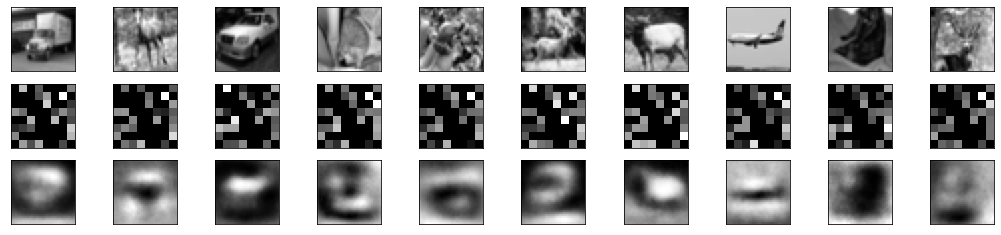

In [60]:
show_images(x_test, [history], nodes)

In [66]:
print(history_loss[0] + 1)

1.6448975205421448


In [77]:
history_loss = history['history']['loss']
print('Loss: ' + str(history_loss[len(history_loss) - 1]))

Loss: 0.5949756503105164


The decoder has a lot more trouble reconstructing grayscale images that are not as simple as the MNIST set of hand drawn numbers. Because the images are so complex, the compression factor needed to be decreased, and the encoded image had to be increased to result in a better reconstructed image.

## Homework 9 ends here

The convolutional autoencoder is for next class/homework

# Homework 10

## Part 1

In [9]:
history = make_autoencoder_layers(x_train=x_train, x_val=x_test, epochs=30, nodes=[32, 512])

Compression factor: 24.5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               16896     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               402192    
Total params: 837,424
Trainable params: 837,424
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# test
encoded_images = history['encoder'].predict(x_test)
decoded_images = history['decoder'].predict(encoded_images)

In [8]:
from tensorflow import reshape
px_size = 28

# returns a list of dictionaries. The dictionaries contain the index of the test image, the difference 
# of the test image and the decoded image as an image and the l2 norm of the difference image as a scalor.
def get_differences(x_test, decoded_images):
    differences = []
    for i, test in enumerate(x_test):
        difference_image = test - decoded_images[i]
        norm = np.linalg.norm(difference_image)
        differences.append({'index':i, 'difference_image':difference_image, 'norm':norm})
    return differences

In [ ]:
differences = get_differences(x_test, decoded_images)    

differences.sort(reverse=True, key=lambda a: a['norm'])    

plt.imshow(reshape(differences[0]['difference_image'], (px_size, px_size)))
plt.gray()
print(differences[0]['norm'])

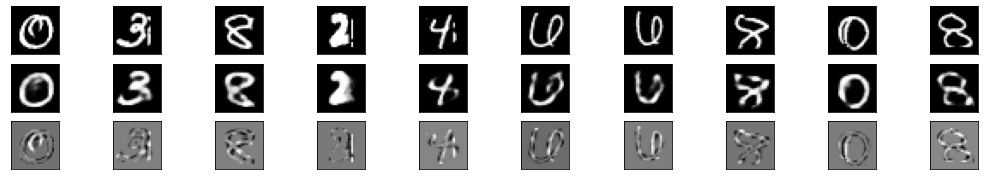

In [12]:
plt.figure(figsize=(18, 3))
num_images = 10

for i, diff_dict in enumerate(differences[0:10]):
    test_index = diff_dict['index']
    
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(reshape(x_test[test_index], (px_size, px_size)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(reshape(decoded_images[test_index], (px_size, px_size)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2 * num_images + i + 1)
    plt.imshow(reshape(diff_dict['difference_image'], (px_size, px_size)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

It is clear the decoded images are very different than the original test image. Most of the error occurs around the border of the shape.

## Part 2

In [7]:
f = open('data1.csv', 'r')
print(f.readline())
print(f.readline())

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class

-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,0.207971242,0.02579058,0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,0



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data1.csv')
x_data = data.iloc[:-3, 0:28].to_numpy(float)
y_data = data['Class'][:-3].to_numpy(int)

max_val = np.amax(x_data)
min_val = np.amin(x_data)

x_data = (x_data + abs(min_val)) / (max_val + abs(min_val))

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.2, random_state = 15)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size=0.1, random_state = 15)

print(x_train2.shape)
print(x_val2.shape)
print(x_test2.shape)

(205060, 28)
(22785, 28)
(56962, 28)


In [63]:
del autoencoder1
del autoencoder2

In [64]:
autoencoder1 = make_autoencoder_layers(x_train=x_train2, x_val=x_test2, epochs=30, nodes=[2, 10], batch_size=128)
autoencoder2 = make_autoencoder_layers(x_train=x_train2, x_val=x_test2, epochs=30, nodes=[2, 4, 8], batch_size=256)

Compression factor: 14.0
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_66 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_67 (Dense)             (None, 28)                308       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________
None
Compression factor: 14.0
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 8)     

Ignore this next cell. I found a different way to make the autoencoder that I should have done from the beginning.

class Autoencoder(Model):
    def __init__(self):
        self.encoeder = self.make_encoder()
        self.decoder = self.make_decoder()
        
    def make_encoder(self):
        pass
    def make_decoder(self):
        pass
    
    def call(data):
        encoded = self.encoder.predict(data)
        decoded = self.decoder.predict(encoded)
        
        return encoded, decoded

In [65]:
#test
encoded_images2_1 = autoencoder1['encoder'].predict(x_test2)
decoded_images2_1 = autoencoder1['decoder'].predict(encoded_images2_1)

encoded_images2_2 = autoencoder2['encoder'].predict(x_test2)
decoded_images2_2 = autoencoder2['decoder'].predict(encoded_images2_2)

In [66]:
differences2_1 = np.array(get_differences(x_test=x_test2, decoded_images=decoded_images2_1))
differences2_2 = np.array(get_differences(x_test=x_test2, decoded_images=decoded_images2_2))

In [67]:
differences2_1_norm = [k['norm'] for k in differences2_1]
differences2_2_norm = [k['norm'] for k in differences2_2]

print(max(np.array(differences2_1_norm) - np.array(differences2_2_norm)))

0.030469003526814642


In [68]:
print(max(differences2_1_norm))

0.337418224701689


(array([0.0000e+00, 2.6150e+03, 2.1507e+04, 1.7120e+04, 9.2650e+03,
        3.6620e+03, 1.1100e+03, 4.5500e+02, 2.9200e+02, 1.8200e+02,
        1.7500e+02, 1.1400e+02, 8.3000e+01, 7.4000e+01, 5.5000e+01,
        4.6000e+01, 3.7000e+01, 2.6000e+01, 2.1000e+01, 1.3000e+01]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  ]),
 <BarContainer object of 20 artists>)

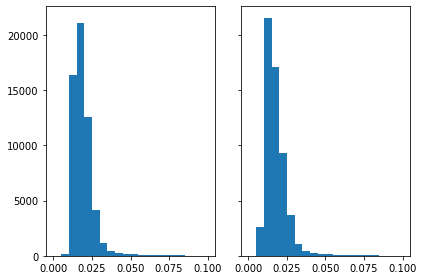

In [69]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)

n_bins = 20

axs[0].hist(differences2_1_norm, bins=n_bins, range=(0.0,0.1))
axs[1].hist(differences2_2_norm, bins=n_bins, range=(0.0,0.1))

(array([2.4000e+01, 1.2000e+01, 2.5000e+01, 5.9000e+01, 1.5600e+02,
        7.1600e+02, 3.2431e+04, 2.2347e+04, 8.2800e+02, 2.1600e+02,
        8.5000e+01, 3.2000e+01, 1.6000e+01, 7.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([0.   , 0.015, 0.03 , 0.045, 0.06 , 0.075, 0.09 , 0.105, 0.12 ,
        0.135, 0.15 , 0.165, 0.18 , 0.195, 0.21 , 0.225, 0.24 , 0.255,
        0.27 , 0.285, 0.3  ], dtype=float32),
 <BarContainer object of 20 artists>)

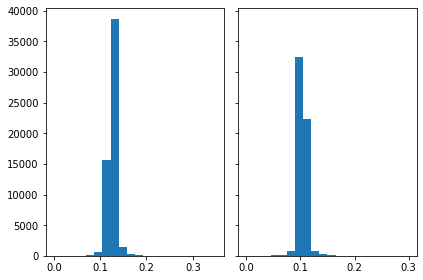

In [70]:
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)

n_bins = 20

axs[0].hist([k[0] for k in encoded_images2_1], bins=n_bins, range=(0.0,0.35))
axs[1].hist([k[1] for k in encoded_images2_1], bins=n_bins, range=(0.0, 0.3))

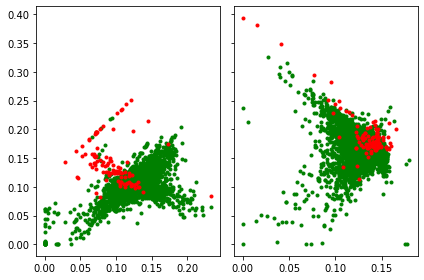

In [71]:
green = []
green2 = []
red = []
red2 = []

for i, encoded in enumerate(encoded_images2_1):
    if y_test2[i] == 1:
        red.append(encoded)
    else:
        green.append(encoded)
        
for i, encoded in enumerate(encoded_images2_2):
    if y_test2[i] == 1:
        red2.append(encoded)
    else:
        green2.append(encoded)
        
fig2, ax2 = plt.subplots(1,2, sharey=True, tight_layout=True)
    
ax2[0].plot(np.array(green)[:, 0], np.array(green)[:, 1], 'g.')
ax2[0].plot(np.array(red)[:, 0], np.array(red)[:, 1], 'r.')
ax2[1].plot(np.array(green2)[:, 0], np.array(green2)[:, 1], 'g.')
ax2[1].plot(np.array(red2)[:, 0], np.array(red2)[:, 1], 'r.')

It is clear that for both of these plots, the area of red points overlaps with the green points.

## Part 3 in Other file.

# Convolutional Autoencoder


In [23]:
# For image convolution, we first need to recover the orignal image size
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))
x_train.shape

(60000, 28, 28, 1)

In [27]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 4, 4, 8)           0         
__________

In [28]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_3').output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15_input (InputLayer) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
Total para

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 57s 942us/step - loss: 0.2088 - val_loss: 0.1332
Epoch 2/100
28800/60000 [=============>................] - ETA: 30s - loss: 0.1284

KeyboardInterrupt: 

# Denoising Images with the Convolutional Autoencoder

In [ ]:
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.5, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

# Denoise test images
x_test_denoised = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(x_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional Autoencoder - Revisit
This time, we use (x_train_noisy, x_train) as training data and (x_test_noisy, x_test) as validation data. In doing so, we’re teaching the autoencoder how to denoise the input images.

In [30]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

# Decoder Layers
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        9248      
__________